<a href="https://colab.research.google.com/github/quadribello/Hamoye/blob/master/Dropout/drop_out_Gender_wise_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Import Relevant Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objects as go
from sklearn.impute import SimpleImputer

In [2]:
drop_out = pd.read_csv('https://raw.githubusercontent.com/KolatimiDave/13-school-progress/master/data/dropout-ratio-2012-2015.csv')

In [3]:
drop_out.head(2)

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
0,A & N Islands,2012-13,0.83,0.51,0.68,Uppe_r_Primary,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14
1,A & N Islands,2013-14,1.35,1.06,1.21,NR,1.54,0.51,8.36,5.98,7.2,18.94,12.2,15.87


In [4]:
sum(drop_out.isna().sum())          #Check for missing values

0

In [5]:
drop_out['State_UT'].unique()

array(['A & N Islands', 'Andhra Pradesh', 'Arunachal  Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra & Nagar Haveli', 'Daman & Diu', 'Delhi',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep',
       'Madhya  Pradesh', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil  Nadu', 'Tamil Nadu',
       'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'All India'], dtype=object)

In [6]:
drop_out['State_UT'] = drop_out['State_UT'].apply(lambda x: "Arunachal Pradesh" if x == 'Arunachal  Pradesh' else x)
drop_out['State_UT'] = drop_out['State_UT'].apply(lambda x: "Madhya Pradesh" if x == 'Madhya  Pradesh' else x)
drop_out['State_UT'] = drop_out['State_UT'].apply(lambda x: "Tamil Nadu" if x == 'Tamil  Nadu' else x)

In [7]:
len(drop_out['State_UT'].unique())

37

In [8]:
all_cols = drop_out.columns.to_list()     # Get all the feature names in a list
categories = all_cols[2:]                 # Get the Student Category types in a list

In [9]:
imputer = SimpleImputer(missing_values = 'NR', strategy='constant', fill_value=0)
imputer_1 = SimpleImputer(missing_values = 'Uppe_r_Primary', strategy='constant', fill_value=0)

In [10]:
drop_out = imputer.fit_transform(drop_out)
drop_out = pd.DataFrame(imputer_1.fit_transform(drop_out), columns=all_cols)

In [11]:
obj = [col for col in all_cols if drop_out[col].dtype == object]    # Check for features with object datatype
len(obj)

14

In [12]:
tmp = []
for categ in categories:
    drop_out[categ] = drop_out[categ].astype(float)                # The datatype of our numerical features is object so we need to change to float.

In [13]:
drop_out.set_index('State_UT', inplace=True)
drop_out.head()

,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
State_UT,,,,,,,,,,,,,
A & N Islands,2012-13,0.83,0.51,0.68,0.00,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14
A & N Islands,2013-14,1.35,1.06,1.21,0.00,1.54,0.51,8.36,5.98,7.20,18.94,12.20,15.87
A & N Islands,2014-15,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93
Andhra Pradesh,2012-13,3.30,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,0.00,0.35
Andhra Pradesh,2013-14,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79


In [14]:
primary_drop_out = drop_out[['year','Primary_Boys', 'Primary_Girls']]
primary_drop_out.head()

,year,Primary_Boys,Primary_Girls
State_UT,,,
A & N Islands,2012-13,0.83,0.51
A & N Islands,2013-14,1.35,1.06
A & N Islands,2014-15,0.47,0.55
Andhra Pradesh,2012-13,3.30,3.05
Andhra Pradesh,2013-14,4.31,4.39


In [15]:
upper_primary_drop_out = drop_out[['year','Upper Primary_Boys', 'Upper Primary_Girls']]
upper_primary_drop_out.head()

,year,Upper Primary_Boys,Upper Primary_Girls
State_UT,,,
A & N Islands,2012-13,0.00,1.09
A & N Islands,2013-14,0.00,1.54
A & N Islands,2014-15,1.44,1.95
Andhra Pradesh,2012-13,3.21,3.51
Andhra Pradesh,2013-14,3.46,4.12


In [16]:
secondary_drop_out = drop_out[['year','Secondary _Boys', 'Secondary _Girls']]
secondary_drop_out.head()

,year,Secondary _Boys,Secondary _Girls
State_UT,,,
A & N Islands,2012-13,5.57,5.55
A & N Islands,2013-14,8.36,5.98
A & N Islands,2014-15,11.47,8.16
Andhra Pradesh,2012-13,12.21,13.25
Andhra Pradesh,2013-14,11.95,13.37


In [17]:
hr_secondary_drop_out = drop_out[['year','HrSecondary_Boys', 'HrSecondary_Girls']]
hr_secondary_drop_out.head()

,year,HrSecondary_Boys,HrSecondary_Girls
State_UT,,,
A & N Islands,2012-13,17.66,10.15
A & N Islands,2013-14,18.94,12.20
A & N Islands,2014-15,21.05,12.21
Andhra Pradesh,2012-13,2.66,0.00
Andhra Pradesh,2013-14,12.65,10.85


In [18]:
primary_drop_out_total = drop_out[['year','Primary_Total']]
primary_drop_out_total.head(6)

,year,Primary_Total
State_UT,,
A & N Islands,2012-13,0.68
A & N Islands,2013-14,1.21
A & N Islands,2014-15,0.51
Andhra Pradesh,2012-13,3.18
Andhra Pradesh,2013-14,4.35
Andhra Pradesh,2014-15,6.72


In [19]:
tmp = []
primary_drop_out_total['Primary_Total'] = primary_drop_out_total['Primary_Total'].astype(float)                # The datatype of our numerical features is object so we need to change to float.
tmp.append(pd.DataFrame({'mean_' + 'Primary_Total' : drop_out.groupby(['State_UT'])['Primary_Total'].mean()}))     # Calculate the mean of drop_out ratio for the 37 states in all 12 student category types.

In [20]:
mean_drop_out_per_state = pd.DataFrame(tmp[0])     # Initially add the first Student Category type in the DataFrame so it's easy to use pd.merge()
for Stu_type in range(1, len(tmp)):           # Starting at an Index of 1 since since I already initialized our dataframe with the first Student type 
    tmp[Stu_type].reset_index(inplace = True)
    mean_drop_out_per_state = pd.merge(mean_drop_out_per_state, tmp[Stu_type], on = 'State_UT')

In [21]:
mean_drop_out_per_state.describe()

,mean_Primary_Total
count,37.000000
mean,4.148153
std,4.166429
min,0.000000
25%,0.800000
50%,2.756667
75%,6.366667
max,15.723333


In [22]:
mean_drop_out_per_state.sort_values(['mean_Primary_Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = mean_drop_out_per_state.head()


df_top5.head()

,mean_Primary_Total
State_UT,
Mizoram,15.723333
Manipur,12.506667
Arunachal Pradesh,12.290000
Nagaland,10.696667
Meghalaya,9.980000


This survery revealed alarming figures of primary school dropout rates in the northeastern region,  Five Northeast states record most primary school dropout rates. the major reasons were poverty or economic reasons, lack of  interest in studies, disabilities or poor health, a child too young to be attending school and a child needed for help in domestic work.

The primary school level drop out rates shows that the efforts of the government of the northeastern states to improve school education is not so good and is yet to yield effective results.

In [23]:
mean_drop_out_per_state.sort_values(['mean_Primary_Total'], ascending=False, axis=0, inplace=True)

# get the least 5 entries
df_least5 = mean_drop_out_per_state.tail()


df_least5.head()

,mean_Primary_Total
State_UT,
Puducherry,0.456667
Goa,0.310000
Delhi,0.000000
Chandigarh,0.000000
Kerala,0.000000


The States which have the lowest dropout rates are Pudecherry, Goa, Delhi,  Chandigarh and Kerala.

In [24]:
primary_drop_out.head()

,year,Primary_Boys,Primary_Girls
State_UT,,,
A & N Islands,2012-13,0.83,0.51
A & N Islands,2013-14,1.35,1.06
A & N Islands,2014-15,0.47,0.55
Andhra Pradesh,2012-13,3.30,3.05
Andhra Pradesh,2013-14,4.31,4.39


In [25]:
# I will select the top 5 states with the highest drop out for visualizations 
df_top5 = primary_drop_out.loc[['Mizoram','Manipur','Arunachal Pradesh','Nagaland','Meghalaya'],:]

In [26]:
df_top5.head(3)

,year,Primary_Boys,Primary_Girls
State_UT,,,
Mizoram,2012-13,24.27,23.93
Mizoram,2013-14,12.57,13.38
Mizoram,2014-15,10.17,10.03


In [27]:
df_top5.reset_index(inplace = True)

In [28]:
fig = go.Figure(
    data=[
        go.Bar(
            name="Primary_Boys",
            x=df_top5['State_UT'],
            y=df_top5['Primary_Boys'],
            offsetgroup=0,
        ),
        go.Bar(
            name="Primary_Girls",
            x=df_top5['State_UT'],
            y=df_top5['Primary_Girls'],
            offsetgroup=1,
        ),

    ],
    layout=go.Layout(
        title="Gender wise drop-out rate among primary category - 2012-13, 2013-14, 2014-15",
        yaxis_title="rates"
    )
)

fig.show()

The dropout rate in Mizoram was the highest in the country in 2012-13 at 24.27 for boys and 23.93 for girls, it reduced to 12.57 for boys and 13.38 in 2013-14

Nagaland has the highest primary level drop-out rate in 2013-14 at 19.09 for boys and 19.74 for girls

Andhra Pradesh has the highest primary drop-out rate in 2014-15 at 11.51 for boys and 10.09 for girls

The highest drop-out rate reduced through the three years

In [29]:
# I will select the top 5 states with the highest drop out for visualizations 
df_least5 = primary_drop_out.loc[['Puducherry','Goa','Delhi','Chandigarh','Kerala'],:]

In [30]:
df_least5.reset_index(inplace = True)

In [31]:
from plotly import graph_objects as go

fig = go.Figure(
    data=[
        go.Bar(
            name="Primary_Boys",
            x=df_least5['State_UT'],
            y=df_least5['Primary_Boys'],
            offsetgroup=0,
        ),
        go.Bar(
            name="Primary_Girls",
            x=df_least5['State_UT'],
            y=df_least5['Primary_Girls'],
            offsetgroup=1,
        ),

    ],
    layout=go.Layout(
        title="Gender wise drop-out rate among primary category- 2012-13, 2013-14, 2014-15",
        yaxis_title="rates"
    )
)

fig.show()

There is no gender disparity in primary level dropouts. Boys and girls quit school in almost equal measure.

In [32]:
upper_primary_drop_out.head()

,year,Upper Primary_Boys,Upper Primary_Girls
State_UT,,,
A & N Islands,2012-13,0.00,1.09
A & N Islands,2013-14,0.00,1.54
A & N Islands,2014-15,1.44,1.95
Andhra Pradesh,2012-13,3.21,3.51
Andhra Pradesh,2013-14,3.46,4.12


In [33]:
upper_primary_drop_out_total = drop_out[['year','Upper Primary_Total']]
upper_primary_drop_out_total.head(6)

,year,Upper Primary_Total
State_UT,,
A & N Islands,2012-13,1.23
A & N Islands,2013-14,0.51
A & N Islands,2014-15,1.69
Andhra Pradesh,2012-13,3.36
Andhra Pradesh,2013-14,3.78
Andhra Pradesh,2014-15,5.20


In [34]:
tmp = []
upper_primary_drop_out_total['Upper Primary_Total'] = upper_primary_drop_out_total['Upper Primary_Total'].astype(float)                # The datatype of our numerical features is object so we need to change to float.
tmp.append(pd.DataFrame({'mean_' + 'Upper Primary_Total' : drop_out.groupby(['State_UT'])['Upper Primary_Total'].mean()}))     # Calculate the mean of drop_out ratio for the 37 states in all 12 student category types.

In [35]:
mean_drop_out_per_state = pd.DataFrame(tmp[0])     # Initially add the first Student Category type in the DataFrame so it's easy to use pd.merge()
for Stu_type in range(1, len(tmp)):           # Starting at an Index of 1 since since I already initialized our dataframe with the first Student type 
    tmp[Stu_type].reset_index(inplace = True)
    mean_drop_out_per_state = pd.merge(mean_drop_out_per_state, tmp[Stu_type], on = 'State_UT')

In [36]:
mean_drop_out_per_state.head()

,mean_Upper Primary_Total
State_UT,
A & N Islands,1.143333
All India,3.643333
Andhra Pradesh,4.113333
Arunachal Pradesh,6.590000
Assam,8.253333


In [37]:
mean_drop_out_per_state.sort_values(['mean_Upper Primary_Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = mean_drop_out_per_state.head()


df_top5.head()

,mean_Upper Primary_Total
State_UT,
Nagaland,11.870000
Mizoram,10.026667
Madhya Pradesh,9.810000
Assam,8.253333
Jharkhand,7.293333


In the upper primary level, Nagaland and Mizoram recorded the highest percentage of drop outs in the country across the 3 years.

In [38]:
mean_drop_out_per_state.sort_values(['mean_Upper Primary_Total'], ascending=False, axis=0, inplace=True)

# get the least 5 entries
df_least5 = mean_drop_out_per_state.tail()


df_least5.head()

,mean_Upper Primary_Total
State_UT,
Himachal Pradesh,0.720000
Puducherry,0.613333
Chandigarh,0.540000
Goa,0.023333
Kerala,0.000000


In [39]:
# I will select the top 5 states with the highest drop out for visualizations 
df_top5 = upper_primary_drop_out.loc[['Nagaland','Mizoram','Madhya Pradesh','Assam','Jharkhand'],:]
df_top5.reset_index(inplace = True)

In [40]:
# I will select the top 5 states with the highest drop out for visualizations 
df_least5 = upper_primary_drop_out.loc[['Himachal Pradesh','Puducherry','Chandigarh','Goa','Kerala'],:]
df_least5.reset_index(inplace = True)

In [41]:
from plotly import graph_objects as go

fig = go.Figure(
    data=[
        go.Bar(
            name="Upper Primary_Boys",
            x=df_top5['State_UT'],
            y=df_top5['Upper Primary_Boys'],
            offsetgroup=0,
        ),
        go.Bar(
            name="Upper Primary_Girls",
            x=df_top5['State_UT'],
            y=df_top5['Upper Primary_Girls'],
            offsetgroup=1,
        ),

    ],
    layout=go.Layout(
        title="Gender wise drop-out rate among Upper Primary Category- 2012-13, 2013-14, 2014-15",
        yaxis_title="rates"
    )
)

fig.show()

Just like in primary level, The dropout rate in Mizoram was the highest in the country in 2012-13 at 19.35 for boys and 19.21 for girls, Though, it shows improvement across the years

Nagaland has the highest upper primary level drop-out rate in 2013-14 at 18.08 for boys and 17.63 for girls

Assam has the higgest upper primary level drop-out in 2014-15 at 10.45 for boys and 10.56 for girl

The highest drop-out rate reduced through the three years

In [42]:
from plotly import graph_objects as go

fig = go.Figure(
    data=[
        go.Bar(
            name="Upper Primary_Boys",
            x=df_least5['State_UT'],
            y=df_least5['Upper Primary_Boys'],
            offsetgroup=0,
        ),
        go.Bar(
            name="Upper Primary_Girls",
            x=df_least5['State_UT'],
            y=df_least5['Upper Primary_Girls'],
            offsetgroup=1,
        ),

    ],
    layout=go.Layout(
        title="Gender wise drop-out rates among Upper Primary category - 2012-13, 2013-14, 2014-15",
        yaxis_title="rates"
    )
)

fig.show()

While there isn’t a huge gap in the percentages of boys and girls dropping out, in some states like Madhya Pradesh, Chandigarh, It shows that at upper primary level girls drop out rate is more than the boys




In [43]:
secondary_drop_out.head()

,year,Secondary _Boys,Secondary _Girls
State_UT,,,
A & N Islands,2012-13,5.57,5.55
A & N Islands,2013-14,8.36,5.98
A & N Islands,2014-15,11.47,8.16
Andhra Pradesh,2012-13,12.21,13.25
Andhra Pradesh,2013-14,11.95,13.37


In [44]:
secondary_drop_out_total = drop_out[['year','Secondary _Total']]
secondary_drop_out_total.head(6)

,year,Secondary _Total
State_UT,,
A & N Islands,2012-13,5.56
A & N Islands,2013-14,7.20
A & N Islands,2014-15,9.87
Andhra Pradesh,2012-13,12.72
Andhra Pradesh,2013-14,12.65
Andhra Pradesh,2014-15,15.71


In [45]:
tmp = []
secondary_drop_out_total['Secondary _Total'] = secondary_drop_out_total['Secondary _Total'].astype(float)                # The datatype of our numerical features is object so we need to change to float.
tmp.append(pd.DataFrame({'mean_' + 'Secondary _Total' : drop_out.groupby(['State_UT'])['Secondary _Total'].mean()}))     # Calculate the mean of drop_out ratio for the 37 states in all 12 student category types.

In [46]:
mean_drop_out_per_state = pd.DataFrame(tmp[0])     # Initially add the first Student Category type in the DataFrame so it's easy to use pd.merge()
for Stu_type in range(1, len(tmp)):           # Starting at an Index of 1 since since I already initialized our dataframe with the first Student type 
    tmp[Stu_type].reset_index(inplace = True)
    mean_drop_out_per_state = pd.merge(mean_drop_out_per_state, tmp[Stu_type], on = 'State_UT')

In [47]:
mean_drop_out_per_state.head()

,mean_Secondary _Total
State_UT,
A & N Islands,7.543333
All India,16.486667
Andhra Pradesh,13.693333
Arunachal Pradesh,14.843333
Assam,28.086667


In [48]:
mean_drop_out_per_state.sort_values(['mean_Secondary _Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = mean_drop_out_per_state.head()


df_top5.head()

,mean_Secondary _Total
State_UT,
Odisha,42.966667
Karnataka,31.223333
Assam,28.086667
Bihar,27.123333
Nagaland,26.616667


The scenario in the northeast is comparatively better in the secondary level. None of the states from the region earned the dubious distinction of being at the top of the chart , however Assam and Nagaland are still included in the top 5 highest drop-out rates

The dropout rate in the secondary education stream in Odisha is almost 50 per cent.

In [49]:
mean_drop_out_per_state.sort_values(['mean_Secondary _Total'], ascending=False, axis=0, inplace=True)

# get the least 5 entries
df_least5 = mean_drop_out_per_state.tail()


df_least5.head()

,mean_Secondary _Total
State_UT,
Himachal Pradesh,7.843333
A & N Islands,7.543333
Lakshadweep,7.490000
Uttar Pradesh,5.840000
Chandigarh,0.000000


In [50]:
# I will select the top 5 states with the highest drop out for visualizations 
df_top5 = secondary_drop_out.loc[['Odisha','Karnataka','Assam','Bihar','Nagaland'],:]
df_top5.reset_index(inplace = True)

In [51]:
df_least5 = secondary_drop_out.loc[['Himachal Pradesh','A & N Islands','Lakshadweep','Uttar Pradesh','Chandigarh'],:]
df_least5.reset_index(inplace = True)

In [52]:
from plotly import graph_objects as go

fig = go.Figure(
    data=[
        go.Bar(
            name="Secondary _Boys",
            x=df_top5['State_UT'],
            y=df_top5['Secondary _Boys'],
            offsetgroup=0,
        ),
        go.Bar(
            name="Secondary _Girls",
            x=df_top5['State_UT'],
            y=df_top5['Secondary _Girls'],
            offsetgroup=1,
        ),

    ],
    layout=go.Layout(
        title="Gender wise drop-out rates among Secondary category - 2012-13, 2013-14, 2014-15",
        yaxis_title="rates"
    )
)

fig.show()

Odisha, though shows a significant improvement of 20 per cent points in 2014-15, The dropout rate in the secondary education stream in Odisha is almost 50 per cent in the previous two years. The improvement is seen as a result of sincere efforts on part of the state government like free textbooks, uniforms, providing multi-lingual education in 21 tribal languages, hostels for girls, seasonal hostels for children of migrant labourers.

In [53]:
from plotly import graph_objects as go

fig = go.Figure(
    data=[
        go.Bar(
            name="Secondary _Boys",
            x=df_least5['State_UT'],
            y=df_least5['Secondary _Boys'],
            offsetgroup=0,
        ),
        go.Bar(
            name="Secondary _Girls",
            x=df_least5['State_UT'],
            y=df_least5['Secondary _Girls'],
            offsetgroup=1,
        ),

    ],
    layout=go.Layout(
        title="Gender wise drop-out rates among secondary category - 2012-13, 2013-14, 2014-15",
        yaxis_title="rates"
    )
)

fig.show()

While there isn’t a huge gap in the percentages of boys and girls dropping out, The minimun drop-out rates is higher compare to other levels

In [54]:
hr_secondary_drop_out.head()

,year,HrSecondary_Boys,HrSecondary_Girls
State_UT,,,
A & N Islands,2012-13,17.66,10.15
A & N Islands,2013-14,18.94,12.20
A & N Islands,2014-15,21.05,12.21
Andhra Pradesh,2012-13,2.66,0.00
Andhra Pradesh,2013-14,12.65,10.85


In [55]:
hr_secondary_drop_out_total = drop_out[['year','HrSecondary_Total']]
hr_secondary_drop_out_total.head()

,year,HrSecondary_Total
State_UT,,
A & N Islands,2012-13,14.14
A & N Islands,2013-14,15.87
A & N Islands,2014-15,16.93
Andhra Pradesh,2012-13,0.35
Andhra Pradesh,2013-14,11.79


In [56]:
tmp = []
hr_secondary_drop_out_total['HrSecondary_Total'] = hr_secondary_drop_out_total['HrSecondary_Total'].astype(float)                # The datatype of our numerical features is object so we need to change to float.
tmp.append(pd.DataFrame({'mean_' + 'HrSecondary_Total' : drop_out.groupby(['State_UT'])['HrSecondary_Total'].mean()}))     # Calculate the mean of drop_out ratio for the 37 states in all 12 student category types.

In [57]:
mean_drop_out_per_state = pd.DataFrame(tmp[0])     # Initially add the first Student Category type in the DataFrame so it's easy to use pd.merge()
for Stu_type in range(1, len(tmp)):           # Starting at an Index of 1 since since I already initialized our dataframe with the first Student type 
    tmp[Stu_type].reset_index(inplace = True)
    mean_drop_out_per_state = pd.merge(mean_drop_out_per_state, tmp[Stu_type], on = 'State_UT')

In [58]:
mean_drop_out_per_state.head()

,mean_HrSecondary_Total
State_UT,
A & N Islands,15.646667
All India,0.513333
Andhra Pradesh,4.046667
Arunachal Pradesh,13.533333
Assam,3.976667


In [59]:
mean_drop_out_per_state.sort_values(['mean_HrSecondary_Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = mean_drop_out_per_state.head()


df_top5.head()

,mean_HrSecondary_Total
State_UT,
Daman & Diu,17.200000
Delhi,16.013333
A & N Islands,15.646667
Arunachal Pradesh,13.533333
Nagaland,13.150000


In [60]:
# I will select the top 5 states with the highest drop out for visualizations 
df_top5 = hr_secondary_drop_out.loc[['Daman & Diu','Delhi','A & N Islands','Arunachal Pradesh','Nagaland'],:]
df_top5.reset_index(inplace = True)

In [61]:
mean_drop_out_per_state.sort_values(['mean_HrSecondary_Total'], ascending=False, axis=0, inplace=True)

# get the least 5 entries
df_least5 = mean_drop_out_per_state.tail(6)


df_least5.head(6)

,mean_HrSecondary_Total
State_UT,
Madhya Pradesh,0.516667
All India,0.513333
Odisha,0.000000
Bihar,0.000000
Meghalaya,0.000000
Rajasthan,0.000000


In [62]:
df_least5 =hr_secondary_drop_out.loc[['Madhya Pradesh','Odisha','Bihar','Meghalaya','Rajasthan'],:]
df_least5.reset_index(inplace = True)

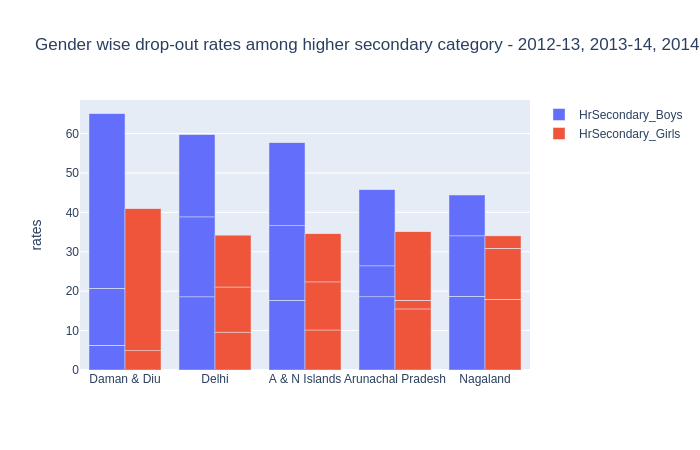

In [87]:
from plotly import graph_objects as go

fig = go.Figure(
    data=[
        go.Bar(
            name="HrSecondary_Boys",
            x=df_top5['State_UT'],
            y=df_top5['HrSecondary_Boys'],
            offsetgroup=0,
        ),
        go.Bar(
            name="HrSecondary_Girls",
            x=df_top5['State_UT'],
            y=df_top5['HrSecondary_Girls'],
            offsetgroup=1,
        ),

    ],
    layout=go.Layout(
        title="Gender wise drop-out rates among higher secondary category - 2012-13, 2013-14, 2014-15",
        yaxis_title="rates"
    )
)

fig.show()

In Daman & Diu, A continuous increase was observed in the dropout
rates of the students, the male dropout increased from 14.48 in 2013-14 to 44.38 in 2014-15. similarly the dropout increased from 4.89 in 2013-14 to 36.05 for the female students.

we have more male students droping out in the top 5 highest drop-out states in india  


## While there isn’t a huge gap in the percentages of boys and girls dropping out, the reasons for them not continuing with their education are very different.

In [86]:
import plotly.io as pio
pio.renderers.default = "png"